In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
'''
date
date of publication of the announcement

price
Price. in rubles

level
Apartment floor

levels
Number of storeys

rooms
the number of living rooms. If the value is "-1", then it means "studio apartment"

area
the total area of the apartment

kitchen_area
Kitchen area

geo_lat
Latitude

geo_lon
Longitude

building_type
Facade type. 0 - Don't know. 1 - Other. 2 - Panel. 3 - Monolithic. 4 - Brick. 5 - Blocky. 6 - Wooden

object_type
Apartment type. 0 - Secondary real estate market; 2 - New building

postal_code
Postal code

street_id
Street ID

id_region
Region of Russia. There are 85 subjects in the country in total

house_id
House ID

'''

'\ndate\ndate of publication of the announcement\n\nprice\nPrice. in rubles\n\nlevel\nApartment floor\n\nlevels\nNumber of storeys\n\nrooms\nthe number of living rooms. If the value is "-1", then it means "studio apartment"\n\narea\nthe total area of the apartment\n\nkitchen_area\nKitchen area\n\ngeo_lat\nLatitude\n\ngeo_lon\nLongitude\n\nbuilding_type\nFacade type. 0 - Don\'t know. 1 - Other. 2 - Panel. 3 - Monolithic. 4 - Brick. 5 - Blocky. 6 - Wooden\n\nobject_type\nApartment type. 0 - Secondary real estate market; 2 - New building\n\npostal_code\nPostal code\n\nstreet_id\nStreet ID\n\nid_region\nRegion of Russia. There are 85 subjects in the country in total\n\nhouse_id\nHouse ID\n\n'

In [3]:
apart_prices = pd.read_csv('apart_prices.csv', sep = ';', dtype={
    'level': 'int32',
    'levels': 'int32',
    'rooms': 'int16',
    'id_region': 'int32'},
    usecols = ['date', 'price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'id_region'])
apart_prices.head(10000)

,date,price,level,levels,rooms,area,kitchen_area,id_region
0,2021-01-01,2451300,15,31,1,30.3,0.0,66
1,2021-01-01,1450000,5,5,1,33.0,6.0,1
2,2021-01-01,10700000,4,13,3,85.0,12.0,50
3,2021-01-01,3100000,3,5,3,82.0,9.0,1
4,2021-01-01,2500000,2,3,1,30.0,9.0,23
...,...,...,...,...,...,...,...,...
9995,2021-01-02,6180000,9,10,4,96.0,9.4,63
9996,2021-01-02,14548000,22,26,2,61.0,13.6,77
9997,2021-01-02,2950000,9,9,1,30.0,0.0,72
9998,2021-01-02,2522470,6,20,1,39.5,0.0,24


In [4]:
# Delete extra ads of the same apartment
apart_prices = apart_prices.drop_duplicates(['level', 'levels', 'rooms', 'area', 'kitchen_area', 'id_region'], keep = 'last')
# Assign NaN to the wrong kitchen area
apart_prices.loc[apart_prices['kitchen_area'] <= 0.0, 'kitchen_area'] = np.NaN
# Delete rows with the wrong id_region and with the wrong price
apart_prices = apart_prices.drop(apart_prices[(apart_prices.id_region == 200) | (apart_prices.price <= 0.0)].index)
# Create a new column about m2 price
apart_prices['m2_price'] = np.int64(apart_prices['price'] / apart_prices['area'])
median_m2_prices = apart_prices.groupby('id_region', as_index = False).agg({'m2_price': 'median'}).sort_values(by='m2_price', ascending=False).head(20)
mean_m2_prices = apart_prices.groupby('id_region', as_index = False).agg({'m2_price': 'mean'}).sort_values(by='m2_price', ascending=False).head(20)
#apart_prices.tail(100)

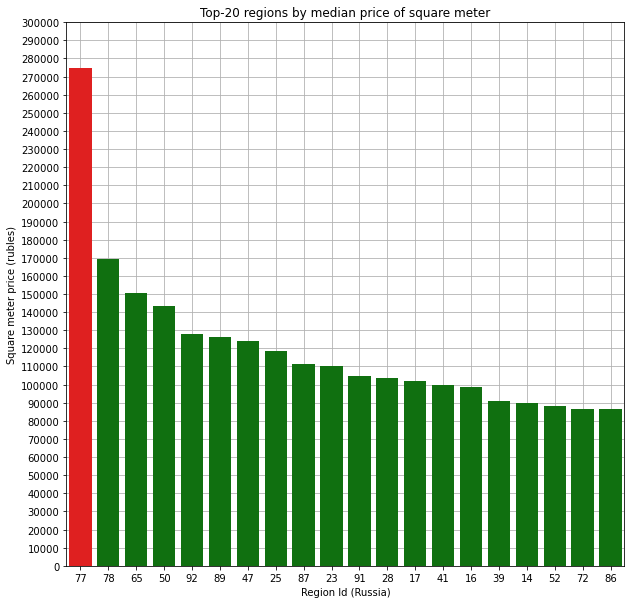

In [11]:
# Top-20 regions by median price of square meter
f, ax = plt.subplots(figsize=(10, 10))
cols = ['red' if (median_m2_price == max(median_m2_prices.m2_price)) else 'green' for median_m2_price in median_m2_prices.m2_price]
sns.barplot(data=median_m2_prices, x='id_region', y='m2_price', ax=ax, palette = cols, 
            order=median_m2_prices.sort_values('m2_price', ascending=False).id_region)
ax.set_ylim(0, 300_000)
ax.set_yticks(range(0, 310_000, 10_000))
ax.set_title('Top-20 regions by median price of square meter')
ax.set_xlabel("Region Id (Russia)")
ax.set_ylabel("Square meter price (rubles)")
ax.grid(True)
ax.set_axisbelow(True)

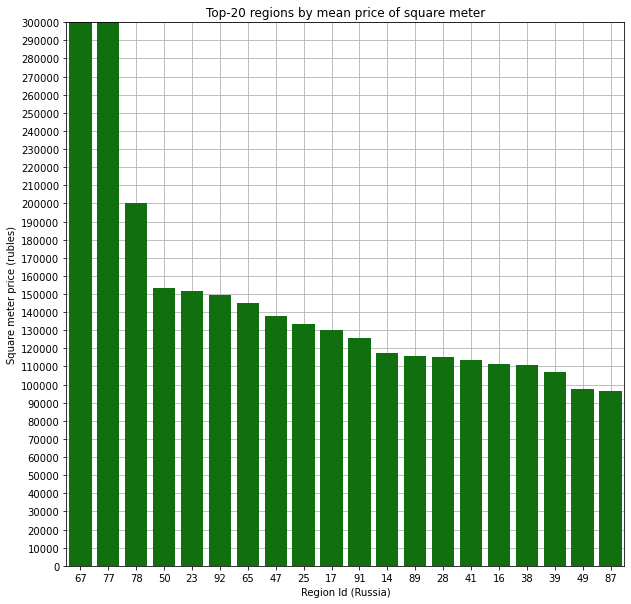

In [5]:
# Top-20 regions by mean price of square meter
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=mean_m2_prices, x='id_region', y='m2_price', ax=ax, color = 'g', 
            order=mean_m2_prices.sort_values('m2_price', ascending=False).id_region)
ax.set_ylim(0, 300_000)
ax.set_yticks(range(0, 310_000, 10_000))
ax.set_title('Top-20 regions by mean price of square meter')
ax.set_xlabel("Region Id (Russia)")
ax.set_ylabel("Square meter price (rubles)")
ax.grid(True)
ax.set_axisbelow(True)

(100000, 100000000)

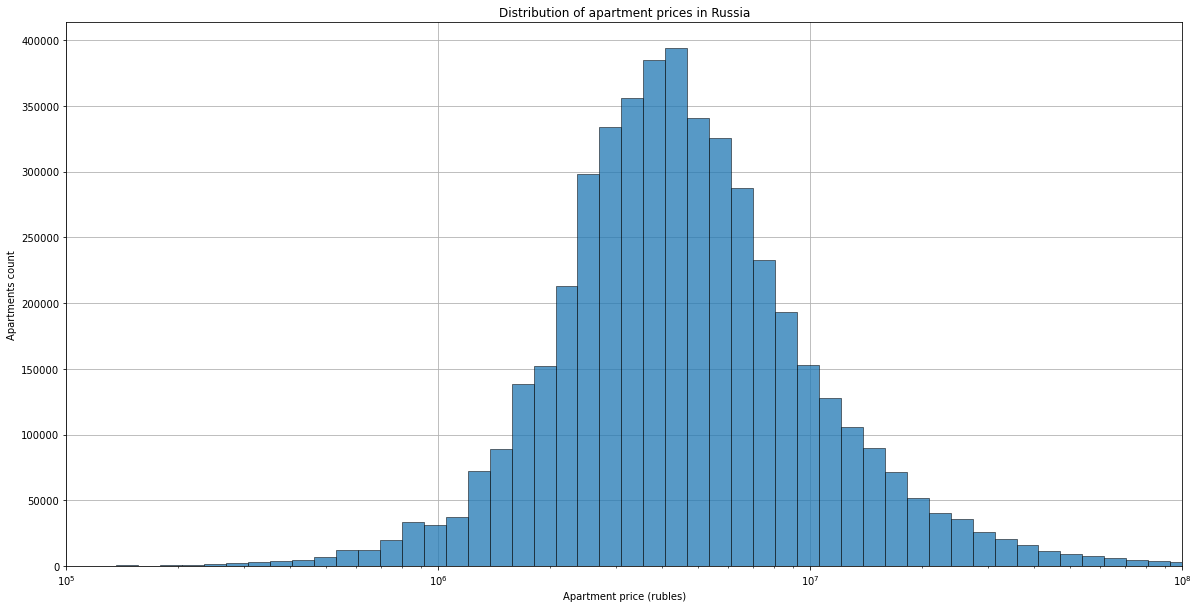

In [6]:
# Distribution of apartment prices in Russia
f, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data = apart_prices, x = 'price', log_scale=True, bins = 200)
ax.set_title('Distribution of apartment prices in Russia')
ax.set_xlabel("Apartment price (rubles)")
ax.set_ylabel("Apartments count")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlim(100_000, 100_000_000)


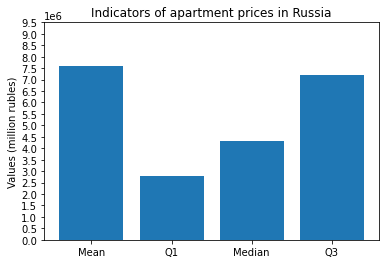

In [7]:
# Statistics metrics about apartment prices in Russia
mean_apart_prices = apart_prices['price'].mean()
quantiles = stat.quantiles(apart_prices['price'])

# Indicators of apartment prices in Russia
labels = np.array(['Mean', 'Q1', 'Median', 'Q3'])
values = np.array([mean_apart_prices, quantiles[0], quantiles[1], quantiles[2]])
plt.bar(labels, values)
plt.ylabel('Values (million rubles)')
plt.title('Indicators of apartment prices in Russia')
plt.yticks(np.arange(0, 10_000_000, 500_000))
plt.show()



In [8]:
# Find percent difference between mean and median prices
print(f'Mean price is {np.round_((mean_apart_prices - quantiles[1]) / quantiles[1] * 100, 2)}% higher than median price')
print('''It means that extremely expensive apartments have high impact on mean price in contrast to cheap apartments
It could be a sign of outliers in the expensive zone
Median shows real prices much better than mean because of asymmetric distribution''')

Mean price is 75.31% higher than median price
It means that extremely expensive apartments have high impact on mean price in contrast to cheap apartments
It could be a sign of outliers in the expensive zone
Median shows real prices much better than mean because of asymmetric distribution


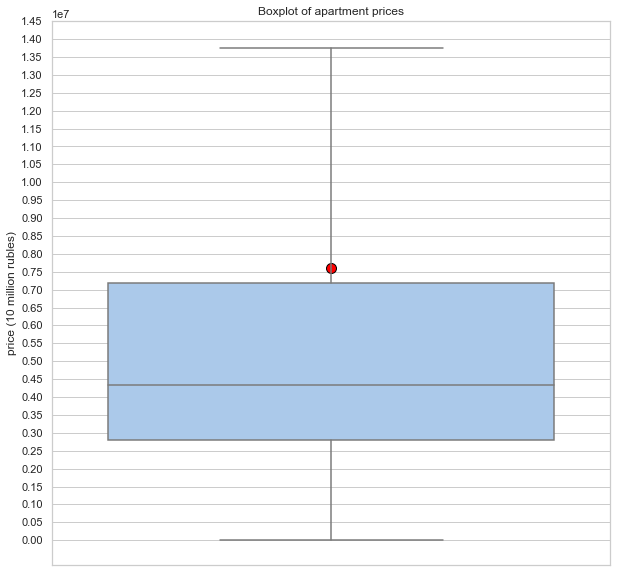

In [9]:
# Boxplot of apartment prices 
fig = plt.figure(figsize = (10, 10))
sns.set_theme(style="whitegrid")
sns.set_palette(palette="pastel")
sns.boxplot(y = apart_prices['price'], showfliers = False)
plt.scatter(0, mean_apart_prices, marker='o', s=100, color = 'red', edgecolors = 'black', label = 'Среднее')
plt.ylabel('price (10 million rubles)')
plt.title('Boxplot of apartment prices')
plt.yticks(np.arange(0, 15_000_000, 500_000))
plt.show()

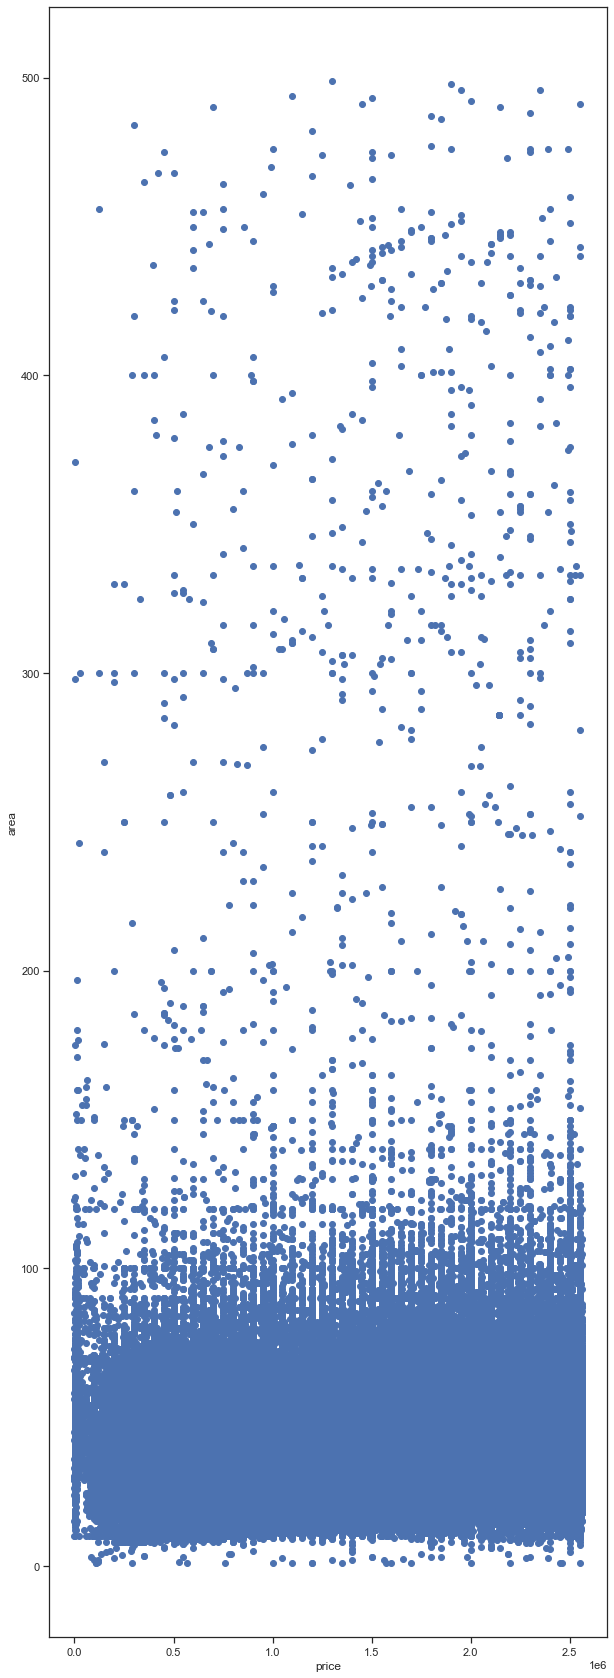

In [30]:
fig, ax = plt.subplots(figsize=(10, 30))
ax.scatter(x = apart_prices.sort_values('price', ascending=True).price.head(1_000_000), 
           y = apart_prices.sort_values('price', ascending=True).area.head(1_000_000))
plt.xlabel("price")
plt.ylabel("area")

plt.show()